In [7]:
import numpy as np
import pandas as pd
from sklearn import cluster , mixture
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider ,  RadioButtons ,Button ,TextBox
import matplotlib.cm as cm
import matplotlib.colors as colors

In [8]:
n_samples = 500
varied = pd.DataFrame(datasets.make_blobs(n_samples=n_samples,centers=4,
                             cluster_std=[1.0, 2.5, 1 , 1],random_state=5)[0])

In [9]:
kmeans = cluster.KMeans(n_clusters= 4)
ward = cluster.AgglomerativeClustering(n_clusters= 4)
spectral = cluster.SpectralClustering()
dbscan = cluster.DBSCAN()
affinity_propagation = cluster.AffinityPropagation()
birch = cluster.Birch(n_clusters= 4)
gmm = mixture.GaussianMixture(n_components=4)

In [10]:
algo = (('kmeans',kmeans),('Agnes-ward',ward),('spectral',spectral),('dbscan',dbscan),('affinity_propagation',affinity_propagation),('birch',birch))

In [11]:
label = 'kmeans'

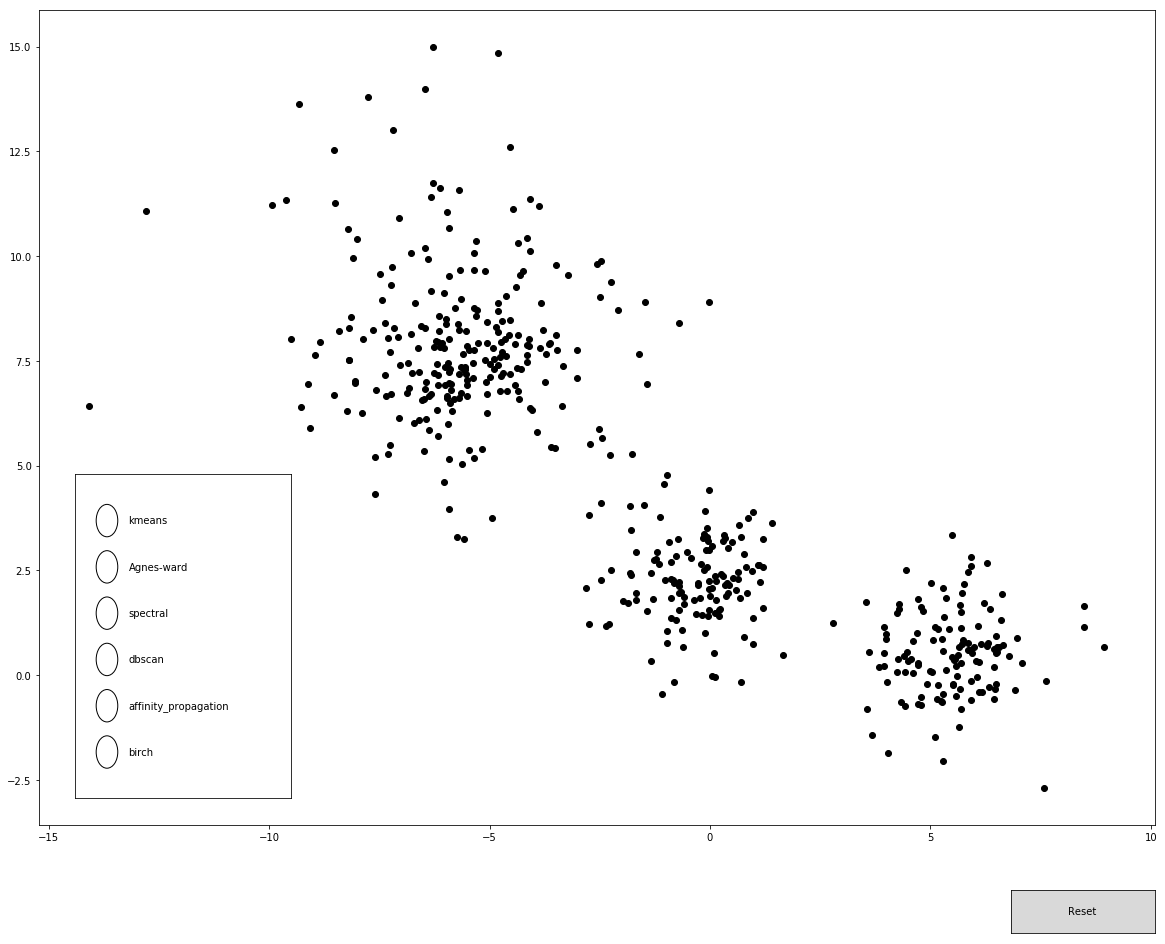

In [24]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
cmap = cm.ScalarMappable(colors.Normalize(0,6))
rax = plt.axes([0.15, 0.15, 0.15, 0.3])
radio = RadioButtons(rax, [i for i,j in algo],active=None,activecolor='k')
col =[j for i,j in algo if i==label][0].fit(varied).labels_
grim = ax.scatter(varied.iloc[:,0],varied.iloc[:,1],c='k')

def colorfunc(label):
    col = [j for i,j in algo if i==label ][0].fit(varied).labels_
    cmap = cm.ScalarMappable(colors.Normalize(0,max(col)))
    radio.activecolor='k'
    grim.set_color(cmap.to_rgba(col))
    fig.canvas.draw_idle()

radio.on_clicked(colorfunc)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset')

def reset(event):
    radio.activecolor='w'
    radio.active=0
    grim.set_color(c='k')
    fig.canvas.draw_idle()

button.on_clicked(reset)
plt.show()